<center>
# Numpy exercise
</center>
**Due** : ~ 2018-03-06 23:59:59

In [1]:
import numpy as np

> **Warning**

> * <font color='red'> Do not use other packages except for `numpy` </font>

> * <font color='red'> Do not modify other code except for `YOUR CODE HERE` </font>

## Problem 1

가로 1m, 세로 1m의 정사각형에 임의의 점 10개를 찍고, 찍힌 점을 순서대로 이어서 처음의 점으로 돌아오는 직선의 길이의 합을 구하시오. 동일한 시행을 총 100,000회 반복하고 평균값과 표준편차를 계산하시오. 100,000회의 시행으로 계산된 거리를 히스토그램 (bin의 개수는 100개)으로 도시하시오. (numpy.random 이용하기)

<center>
<img src="https://preview.ibb.co/dEQNhc/3.png" alt="Drawing" style="width: 400px;"/>
</center>


In [2]:
def length_on_square(n=100000):
    
    #################################
    #     Method 1 : Inefficient    #
    #################################
    def distance(x):
        return np.sqrt(np.dot(np.transpose(x),x))

    length_array=np.zeros(n)
    for i in range(0,100000):
        data=np.random.rand(2,10)
        total_distance=distance(data[:,0]-data[:,9])
        for j in range(0,9):
            total_distance+=distance(data[:,j]-data[:,j+1])
        length_array[i,0]=total_distance
    
    return length_array

In [5]:
%%time
length_on_square()

Wall time: 61 ms


array([6.07303969, 6.28476012, 6.76643776, ..., 4.91471398, 5.66457762,
       6.01083357])

In [4]:
def length_on_square(n=100000):
    
    #################################
    #       Method 2 : Efficient    #
    #################################
    S = np.random.rand(2,10,n)
    S = np.append(S,S[:,0,:].reshape(2,1,n),axis=1)
    length_array = np.sqrt(((S[:,1:,:] - S[:,:-1,:])**2).sum(axis=0)).sum(axis=0)

    return length_array

In [70]:
%%time
length_array = length_on_square(100000)
print('AVG : ' + str(length_array.mean()))
print('STD : ' + str(length_array.std()))

AVG : 5.2088378871594
STD : 0.8680342989722174
Wall time: 62 ms


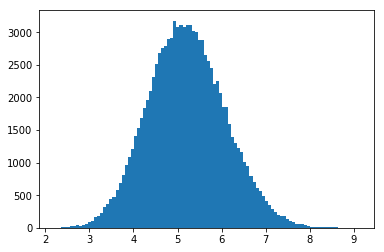

In [5]:
import matplotlib.pyplot as plt

plt.hist(length_array, bins=100)
plt.show()

## Problem 2

주가 일간 수익률 데이터 (csv 파일)를 읽어서 (list로 만들고, ndarray로 변환) 수익률의 평균, 표준편차, 분산-공분산행렬, 상관계수행렬 계산
투자비중이 w인 포트폴리오의 기대수익률과 수익률의 표준편차를 numpy 행렬연산으로 계산


In [6]:
from pandas import read_csv

ndarray = read_csv('Lecture 3-1 numpy exercise.csv').values

In [7]:
def calc_mean(ndarray):
        
    #########################
    #     YOUR CODE HERE    #
    # mean : 1d numpy array #
    #########################
    mean = ndarray.mean(axis=0)
    
    return mean

In [8]:
def calc_std(ndarray):
    
    #########################
    #     YOUR CODE HERE    #
    # std : 1d numpy array  #
    #########################
    std = ndarray.std(axis=0)
    
    return std

In [9]:
def calc_cov(ndarray):
    
    ########################
    #    YOUR CODE HERE    #
    # cov : 2d numpy array #
    ########################
    cov = np.cov(ndarray.T)
    
    return cov

In [10]:
print('MEAN : '+ str(calc_mean(ndarray)))
print('STD  : '+ str(calc_std(ndarray)))

MEAN : [ 0.13845238  0.15666667  0.21464286 -0.13095238  0.26142857 -0.09297619
  0.19690476]
STD  : [1.35709204 1.51350849 1.4958247  1.40346054 2.07293221 1.45391326
 1.26407973]


In [11]:
print(calc_cov(ndarray))

[[ 1.86388794  0.78160803  0.59904944 -0.067928    0.69113477  0.15407486
   0.4818831 ]
 [ 0.78160803  2.31830683  1.77335904  0.43266908  0.13747952  0.47947309
   1.13360884]
 [ 0.59904944  1.77335904  2.26444927  0.4938599   0.03530052  0.07685374
   1.12742298]
 [-0.067928    0.43266908  0.4938599   1.99343282 -0.80458898 -0.40958239
   0.30279943]
 [ 0.69113477  0.13747952  0.03530052 -0.80458898  4.34881962  0.84210912
   0.43615026]
 [ 0.15407486  0.47947309  0.07685374 -0.40958239  0.84210912  2.139332
   0.11749911]
 [ 0.4818831   1.13360884  1.12742298  0.30279943  0.43615026  0.11749911
   1.61714934]]


In [12]:
w = np.array([0.3, 0.2, 0.1, 0.1, 0.1, 0.2, 0])

In [13]:
def port_mean(ndarray, w):
    
    ####################
    #  YOUR CODE HERE  #
    # mean : float     #
    ####################
    mean = calc_mean(ndarray).dot(w)
    
    return mean

def port_std(ndarray, w):
    
    ####################
    #  YOUR CODE HERE  #
    # std : float      #
    ####################
    std = np.sqrt(w.dot(calc_cov(ndarray)).dot(w))
    
    return std

In [14]:
print('MEAN : ' + str(port_mean(ndarray, w)))
print('STD  : ' + str(port_std(ndarray, w)))

MEAN : 0.08878571428571429
STD  : 0.8744739013434357


In [77]:
def port_std(ndarray, w):
    
    ####################
    #  YOUR CODE HERE  #
    # std : float      #
    ####################
    std = np.std(ndarray.dot(w))
    
    return std

In [78]:
print('MEAN : ' + str(port_mean(ndarray, w)))
print('STD  : ' + str(port_std(ndarray, w)))

MEAN : 0.08878571428571429
STD  : 0.8692531149735135
